<a href="https://colab.research.google.com/github/HarimJung/Machine-Learning-Analytics/blob/master/0705_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (회귀분석) 위 plot을 보면 mean radius와 mean area 두 특징 사이에는 양의 선형 상관 관계가 있는 것으로 추정된다. mean area를 목적변수, mean radius를 설명변수로 하는 선형 회귀 분석을 수행하고 회귀식을 (a) 수식 및 (b) 그림으로 나타내어보시오(즉, 1번에선 양성/악성 정보를 쓰지 않는다). (c) mean radius 값이 20일 때, mean area의 추정값을 계산해보시오. ::: 빨간선을 리니어로 그려서 스코어 확인::::

In [16]:
# 1. 유방암 진단 데이터

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
#print(cancer.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

cancer is [list], so we need to make *cancer.data* as a DataFrame, put the colums with *cancer.feature_names*

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

 so add the df["class"], new series with the cancer.target 

In [0]:
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

In [0]:
# draw the pairplot within cancer dataset to look the correlation.

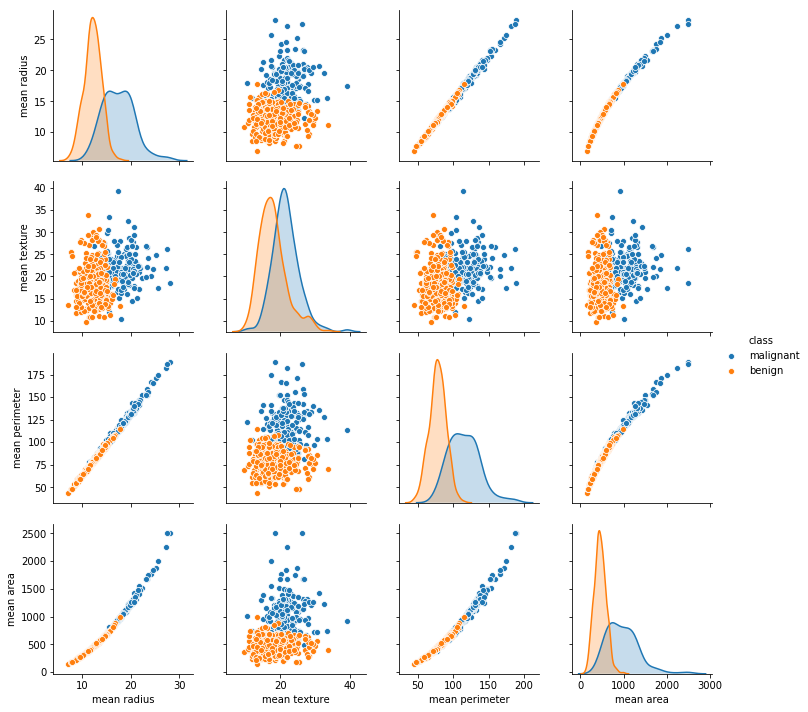

In [10]:

sns.pairplot(vars=["mean radius", "mean texture", "mean perimeter", "mean area"], 
             hue="class", data=df)
plt.show()

# 1. mean area=y  & mean radius = x, draw the regression model

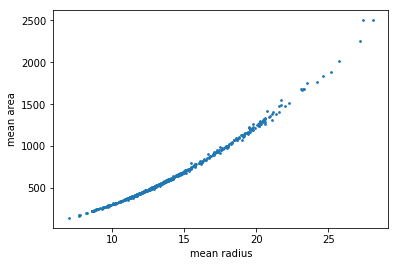

In [27]:
x=df[["mean radius"]]## reshape it as dataframe
y=df[["mean area"]]
plt.scatter(x,y,s=3)
plt.xlabel("mean radius")
plt.ylabel("mean area")
plt.show()

In [0]:
# draw the linear regression as model

# (1-a) 수식으로 나타내기

In [28]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


model=LinearRegression().fit(x,y)
print(model.coef_,model.intercept_)

[[98.59821922]] [-738.0367042]


# (1-b) 그림으로 나타내기

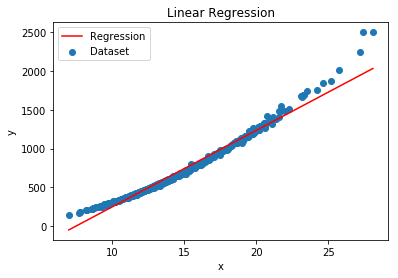

In [29]:
import statsmodels.api as sm

x_new = np.linspace(np.min(x), np.max(x), 100) # split the x into 100 
X_new = sm.add_constant(x_new)
y_new = model.intercept_+ model.coef_*x_new 
#to make the regreesion model 

plt.scatter(x, y, label="Dataset") # x, y scatter
plt.plot(x_new, y_new, 'r-', label="Regression") # r is red color, x_new, y_new
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend() # 빨간것과 선을 명시하하는것
plt.show()

# (1-c) mean radius 값이 20일 때, mean area의 추정값을 계산해보시오

In [32]:
mean_radius=20
anti_score=model.intercept_+ model.coef_*mean_radius
print(anti_score)

[[1233.92768011]]


2. (분류) 위 plot을 보면 mean texture와 mean area 두 특징을 사용하면 클래스가 구분될 것으로 기대된다. (a) SVM 분류기(classifier)를 학습 후 결정 경계(decision boundary)를 표현해보시오. (b) RBF kernel + SVM의 수행 결과를 표현해보시오. :::그림만 그려보라는거지.

In [0]:
from sklearn.datasets import load_breast_cancer # iris 데이터셋
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer.data[:, [1, 3]] # iris 데이터의전체행의 2,3의 컬럼들을 보고싶다
y = cancer.target 

# train 과 test를 자른다. train_test_split 함수, 0.3으로 나눔. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #seed number 이다)

                                                    
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_cancer(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("mean texture")
    plt.ylabel("mean area")
    plt.title(title)


# (2-a,b,c) SVM 그림그리기

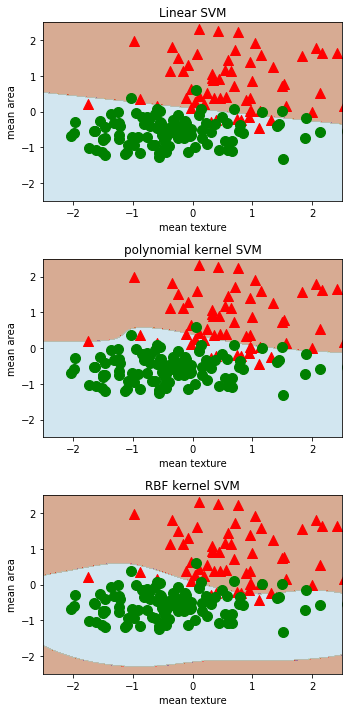

In [61]:
from sklearn.svm import SVC
import matplotlib as mpl

# support vector classifier

# SVC.(model).fit
model1 = SVC(kernel='linear').fit(X_test_std, y_test)

model2 = SVC(kernel='poly', random_state=3,
             gamma=10, C=1.0).fit(X_test_std, y_test)

model3 = SVC(kernel='rbf', random_state=5, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(5, 10))

plt.subplot(311)
plot_cancer(X_test_std, y_test, model1, "Linear SVM")

plt.subplot(312)
plot_cancer(X_test_std, y_test, model2, "polynomial kernel SVM")

plt.subplot(313)
plot_cancer(X_test_std, y_test, model3, "RBF kernel SVM")

plt.tight_layout()
plt.show()

3. (차원 축소) 2번과 마찬가지로 mean texture, mean area 두 개의 feature만을 사용하여, 2차원에서 1차원으로 축소하는 PCA를 수행한 후 결과 좌표값을 나타내어보시오. 위 plot처럼 각 데이터 point마다 label 값을 색깔로 표현하여 보시오. :: 그림그려서 좌표값.

In [0]:
# cancer.keys() list

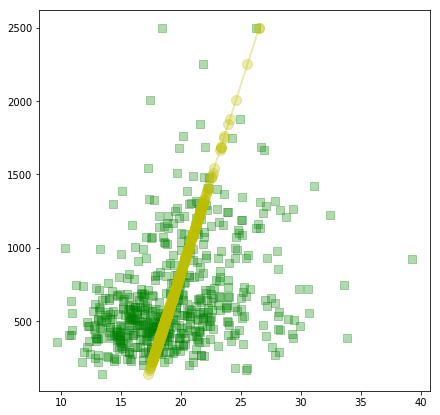

In [116]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
X = cancer.data[:, [1, 3]]
X=pd.DataFrame(X)

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
plt.scatter(X[0],X[1],s=50,color="g", alpha=0.3, marker="s")

plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10, alpha=0.3, color="y")


4. (비지도 학습) 2번과 마찬가지로 mean texture, mean area 두 개의 feature만을 사용하여 k-means 클러스터링을 수행하여 보시오. (a) k=2, (b) k=3일 때, 각각에 대한 결과를 그림으로 나타내어보시오.

# (4-a) k=2,  KMeans drawing

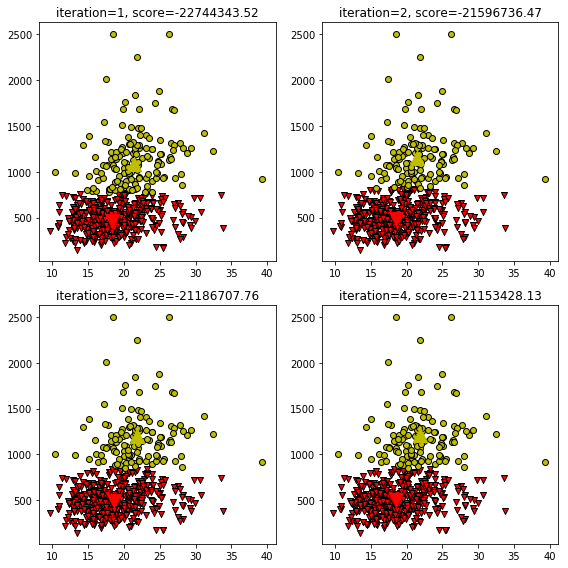

In [105]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans


cancer = load_breast_cancer()
X = cancer.data[:, [1, 3]]
X=pd.DataFrame(X)
X.head()

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=2, max_iter=n, random_state=8).fit(X)
    
    c0, c1 = model.cluster_centers_
    
    plt.scatter(X.iloc[model.labels_ == 0, 0], X.iloc[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X.iloc[model.labels_ == 1, 0], X.iloc[model.labels_ == 1, 1], marker='o', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))

plt.subplot(221)
plot_KMeans(1)

plt.subplot(222)
plot_KMeans(2)

plt.subplot(223)
plot_KMeans(3)

plt.subplot(224)
plot_KMeans(4)

plt.tight_layout()
plt.show()





# (4-b) k=23,  KMeans drawing

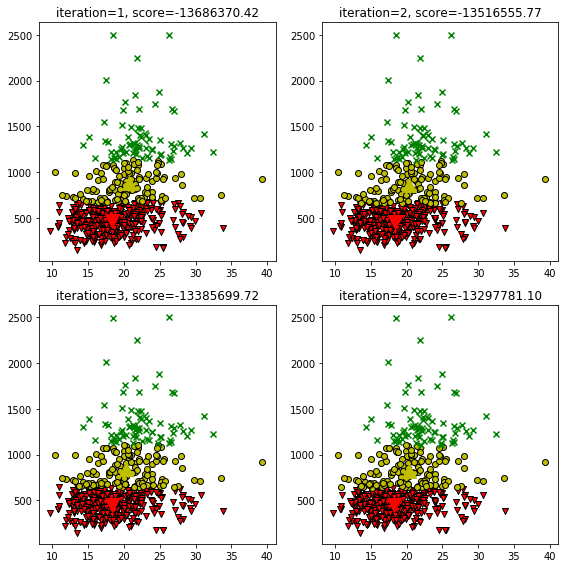

In [106]:
def plot_KMeans(n):
    model = KMeans(n_clusters=3, init="random", n_init=2, max_iter=n, random_state=8).fit(X)
    
    c0, c1, c2 = model.cluster_centers_
    
    plt.scatter(X.iloc[model.labels_ == 0, 0], X.iloc[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X.iloc[model.labels_ == 1, 0], X.iloc[model.labels_ == 1, 1], marker='o', facecolor='y', edgecolors='k')
    plt.scatter(X.iloc[model.labels_ == 2, 0], X.iloc[model.labels_ == 2, 1], marker='x', facecolor='g', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.scatter(c2[0], c2[1], marker='x', c="g", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))

plt.subplot(221)
plot_KMeans(1)

plt.subplot(222)
plot_KMeans(2)

plt.subplot(223)
plot_KMeans(3)

plt.subplot(224)
plot_KMeans(4)

plt.tight_layout()
plt.show()